,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


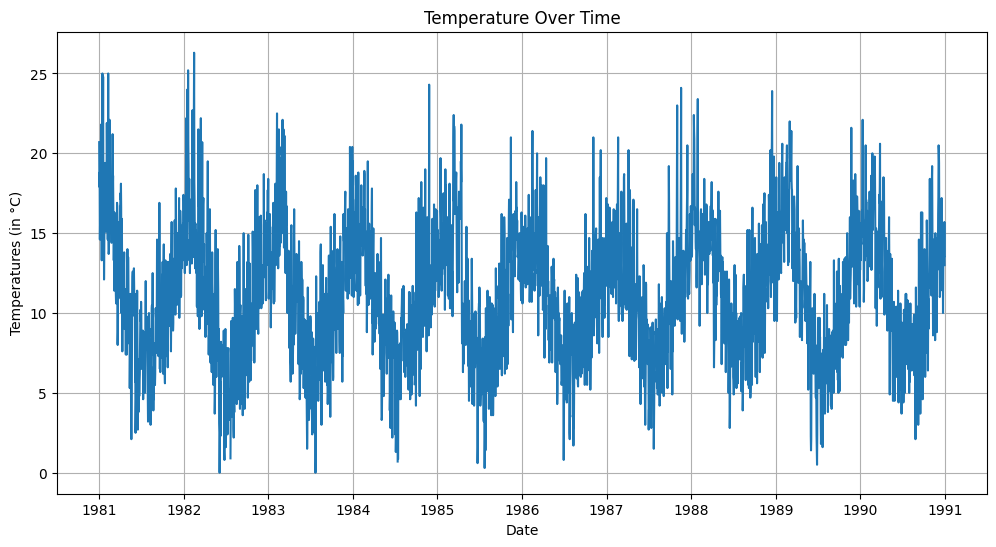

date    datetime64[ns]
temp           float64
dtype: object


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
path = 'data/daily-minimum-temperatures.csv'
temperatures = pd.read_csv(path, parse_dates=['Date'])
temperatures = temperatures.rename(columns={'Date':'date', 'Daily minimum temperatures':'temp'})
display(temperatures.head(5))

# visualize data
temperatures['temp'] = pd.to_numeric(temperatures['temp'], errors='coerce')

plt.figure(figsize=(12,6))
plt.plot(temperatures['date'], temperatures['temp'], linestyle='-', label='temperature')
plt.xlabel('Date')
plt.ylabel('Temperatures (in °C)')
plt.title('Temperature Over Time')
plt.grid(True)
plt.show()

print(temperatures.dtypes)

,ds,y
3464,1990-06-29,5.6
3465,1990-06-30,9.4
3466,1990-07-01,7.4
3467,1990-07-02,7.3
3468,1990-07-03,7.7


,ds,y
3469,1990-07-04,7.7
3470,1990-07-05,9.3
3471,1990-07-06,4.4
3472,1990-07-07,5.7
3473,1990-07-08,10.2


15:35:26 - cmdstanpy - INFO - Chain [1] start processing
15:35:26 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,1981-01-01
1,1981-01-02
2,1981-01-03
3,1981-01-04
4,1981-01-05
...,...
3644,1990-12-26
3645,1990-12-27
3646,1990-12-28
3647,1990-12-29


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.882340,11.733947,18.728582,11.882340,11.882340,3.397437,3.397437,3.397437,-0.015104,-0.015104,-0.015104,3.412541,3.412541,3.412541,0.0,0.0,0.0,15.279777
1,1981-01-02,11.880429,11.994124,18.844461,11.880429,11.880429,3.475219,3.475219,3.475219,-0.007497,-0.007497,-0.007497,3.482715,3.482715,3.482715,0.0,0.0,0.0,15.355648
2,1981-01-03,11.878519,12.041531,18.895095,11.878519,11.878519,3.554456,3.554456,3.554456,0.003430,0.003430,0.003430,3.551026,3.551026,3.551026,0.0,0.0,0.0,15.432975
3,1981-01-04,11.876608,11.855921,18.935984,11.876608,11.876608,3.456526,3.456526,3.456526,-0.159955,-0.159955,-0.159955,3.616481,3.616481,3.616481,0.0,0.0,0.0,15.333134
4,1981-01-05,11.874697,12.097525,18.927011,11.874697,11.874697,3.680346,3.680346,3.680346,0.002210,0.002210,0.002210,3.678136,3.678136,3.678136,0.0,0.0,0.0,15.555044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,1990-12-26,11.380177,11.026945,17.733655,11.353994,11.405503,3.095975,3.095975,3.095975,0.118171,0.118171,0.118171,2.977805,2.977805,2.977805,0.0,0.0,0.0,14.476153
3645,1990-12-27,11.379915,10.980196,18.118522,11.353545,11.405584,3.022007,3.022007,3.022007,-0.015104,-0.015104,-0.015104,3.037112,3.037112,3.037112,0.0,0.0,0.0,14.401922
3646,1990-12-28,11.379652,10.922717,17.734143,11.353015,11.405791,3.092801,3.092801,3.092801,-0.007497,-0.007497,-0.007497,3.100297,3.100297,3.100297,0.0,0.0,0.0,14.472452
3647,1990-12-29,11.379389,11.144038,18.126412,11.352500,11.405845,3.170134,3.170134,3.170134,0.003430,0.003430,0.003430,3.166704,3.166704,3.166704,0.0,0.0,0.0,14.549523


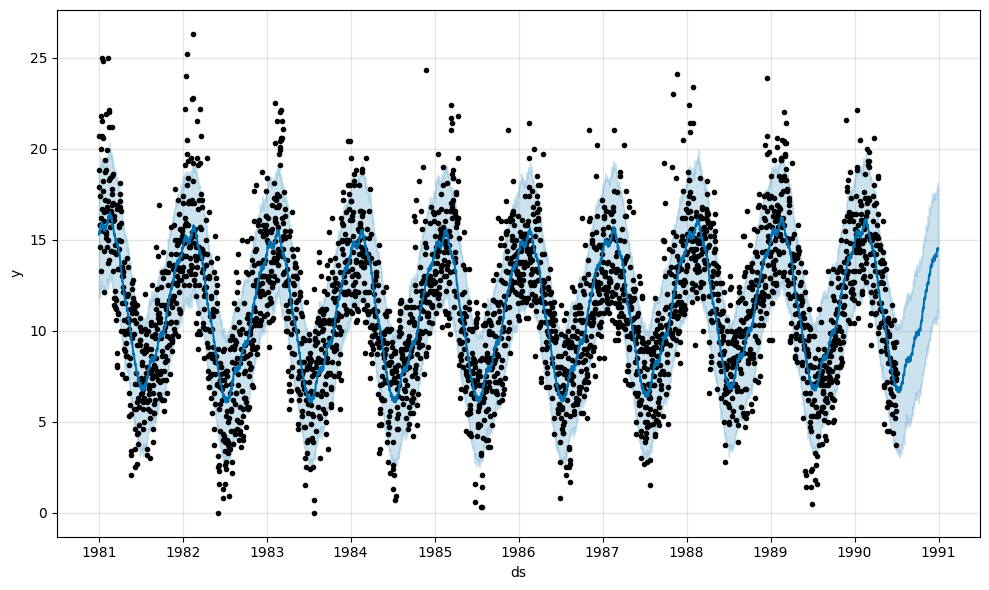

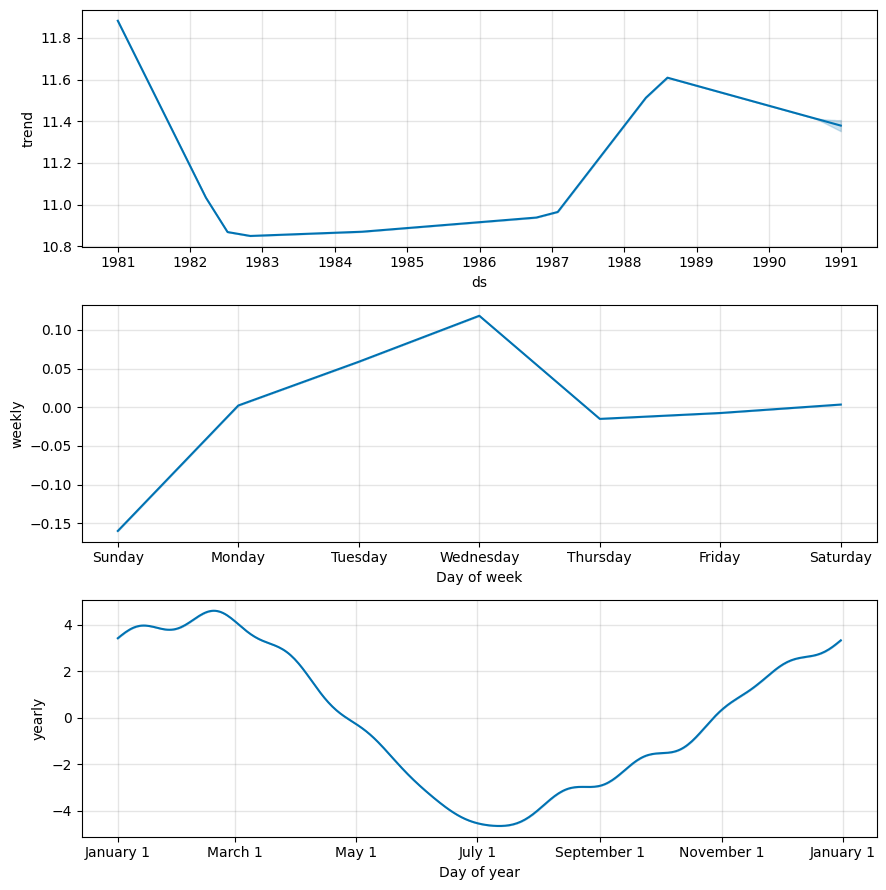

In [103]:
from prophet import Prophet

# initialize model
basic_prophet_model = Prophet()

# format input
temperatures = temperatures.rename(columns={'date':'ds', 'temp':'y'})
temperatures = temperatures.sort_values(by=['ds'])

# train/test split 
forecast_horizon = 30*6
is_in_test_set = temperatures['ds']>=(temperatures['ds'].max()-pd.Timedelta(days=forecast_horizon))
temperatures_test = temperatures[is_in_test_set]
temperatures_train = temperatures[~is_in_test_set]
display(temperatures_train.tail(), temperatures_test.head())

# train model
basic_prophet_model.fit(temperatures_train)

# generate prediction dates
future = basic_prophet_model.make_future_dataframe(periods=forecast_horizon, freq='D')
display(future)

# make the predictions
temperatures_forecast = basic_prophet_model.predict(future)
display(temperatures_forecast)

# plot the forecast
forecast_plot = basic_prophet_model.plot(temperatures_forecast)

# plot components
time_series_components = basic_prophet_model.plot_components(temperatures_forecast)